In [1]:
import pandas as pd
import numpy as np

# Membaca semua dataset F1 yang diperoleh dari Kaggle.com

In [2]:
circuits = pd.read_csv(r'dataset\circuits.csv')
constructor_results = pd.read_csv(r'dataset\constructor_results.csv')
constructor_standings = pd.read_csv(r'dataset\constructor_standings.csv')
constructors = pd.read_csv(r'dataset\constructors.csv')
driver_standings = pd.read_csv(r'dataset\driver_standings.csv')
drivers = pd.read_csv(r'dataset\drivers.csv')
lap_times = pd.read_csv(r'dataset\lap_times.csv')
pit_stops = pd.read_csv(r'dataset\pit_stops.csv')
qualifying = pd.read_csv(r'dataset\qualifying.csv')
races = pd.read_csv(r'dataset\races.csv')
results = pd.read_csv(r'dataset\results.csv')
seasons = pd.read_csv(r'dataset\seasons.csv')
sprint_results = pd.read_csv(r'dataset\sprint_results.csv')
status = pd.read_csv(r'dataset\status.csv')

In [57]:
circuits

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park
...,...,...,...,...,...,...,...,...,...
74,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,108,http://en.wikipedia.org/wiki/Algarve_Internati...
75,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.99750,11.37190,255,http://en.wikipedia.org/wiki/Mugello_Circuit
76,77,jeddah,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,21.63190,39.10440,15,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...
77,78,losail,Losail International Circuit,Al Daayen,Qatar,25.49000,51.45420,\N,http://en.wikipedia.org/wiki/Losail_Internatio...


In [3]:
df1 = pd.merge(races,results,how='inner',on=['raceId'])
df2 = pd.merge(df1,qualifying,how='inner',on=['raceId','driverId','constructorId'])
df3 = pd.merge(df2,drivers,how='inner',on=['driverId'])
df4 = pd.merge(df3,constructors,how='inner',on=['constructorId'])
df = pd.merge(df4,circuits,how='inner',on=['circuitId'])

C:\Users\Nikolas Ermando\AppData\Local\Temp\ipykernel_19436\2916746812.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'url_x'} in the result is deprecated and will raise a MergeError in a future version.
  df = pd.merge(df4,circuits,how='inner',on=['circuitId'])


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9185 entries, 0 to 9184
Data columns (total 51 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   raceId           9185 non-null   int64  
 1   year             9185 non-null   int64  
 2   round            9185 non-null   int64  
 3   circuitId        9185 non-null   int64  
 4   name_x           9185 non-null   object 
 5   date             9185 non-null   object 
 6   time_x           9185 non-null   object 
 7   url_x            9185 non-null   object 
 8   resultId         9185 non-null   int64  
 9   driverId         9185 non-null   int64  
 10  constructorId    9185 non-null   int64  
 11  number_x         9185 non-null   object 
 12  grid             9185 non-null   int64  
 13  position_x       9185 non-null   object 
 14  positionText     9185 non-null   object 
 15  positionOrder    9185 non-null   int64  
 16  points           9185 non-null   float64
 17  laps          

# Hapus kolom yang dinilai tidak berpotensi untuk digunakan dalam machine learning prediksi F1

In [5]:
df = df.drop(['round','circuitId','time_x','url_x','resultId','driverId','constructorId','number_x','positionText','position_y','positionOrder','laps','time_y','rank','fastestLapTime','fastestLapSpeed','qualifyId','driverRef','number','code','url_y','circuitRef','location','lat','lng','alt','number_y','points','constructorRef','name_x','raceId','fastestLap','milliseconds'],axis=1)

In [6]:
df['fullname'] = df['forename'] + " " + df['surname']

In [7]:
df = df.drop(['forename','surname'],axis=1)

In [8]:
df['q1'] = df['q1'].apply(lambda x: np.nan if x == r'\N' else x)
df['q2'] = df['q2'].apply(lambda x: np.nan if x == r'\N' else x)
df['q3'] = df['q3'].apply(lambda x: np.nan if x == r'\N' else x)

In [9]:
def qualifying_status(cols):
    q1 = cols[0]
    q2 = cols[1]
    q3 = cols[2]
    if ((pd.isnull(q1))&(pd.isnull(q2))&(pd.isnull(q3))):
        x = '4'
    else:
        if pd.isnull(q3):
            if pd.isnull(q2):
                x='3'
            else:
                x='2'
        else:
            x='1'
    return x

In [10]:
df['q_status'] = df[['q1','q2','q3']].apply(qualifying_status, axis=1)
df.drop(['q1','q2','q3'],axis=1,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9185 entries, 0 to 9184
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           9185 non-null   int64 
 1   date           9185 non-null   object
 2   grid           9185 non-null   int64 
 3   position_x     9185 non-null   object
 4   statusId       9185 non-null   int64 
 5   dob            9185 non-null   object
 6   nationality_x  9185 non-null   object
 7   name_y         9185 non-null   object
 8   nationality_y  9185 non-null   object
 9   name           9185 non-null   object
 10  country        9185 non-null   object
 11  fullname       9185 non-null   object
 12  q_status       9185 non-null   object
dtypes: int64(3), object(10)
memory usage: 1004.6+ KB


# Melakukan penyesuaian data
Beberapa constructor telah menganti nama maupun dibeli oleh constructor lainnya.

In [12]:
df.rename(columns={'position_x':'position','nationality_x':'driver_nationality',
                   'name_y':'constructor','nationality_y':'constructor_nationality','name':'circuit',
                  },inplace=True)

In [13]:
df['constructor'] = df['constructor'].apply(lambda x:'Mercedes' if x == 'Brawn' else x)
df['constructor'] = df['constructor'].apply(lambda x:'Mercedes' if x == 'BAR' else x)
df['constructor'] = df['constructor'].apply(lambda x:'Alpine F1 Team' if x == 'Renault' else x)
df['constructor'] = df['constructor'].apply(lambda x:'Alpine F1 Team' if x == 'Benetton' else x)
df['constructor'] = df['constructor'].apply(lambda x:'Red Bull' if x == 'Stewart' else x)
df['constructor'] = df['constructor'].apply(lambda x:'Aston Martin' if x == 'Jordan' else x)
df['constructor'] = df['constructor'].apply(lambda x:'AlphaTauri' if x == 'Minardi' else x)
df['constructor'] = df['constructor'].apply(lambda x:'Manor Marussia' if x == 'Virgin' else x)
df['constructor'] = df['constructor'].apply(lambda x:'Manor Marussia' if x == 'Marussia' else x)
df['constructor'] = df['constructor'].apply(lambda x:'AlphaTauri' if x == 'Toro Rosso' else x)
df['constructor'] = df['constructor'].apply(lambda x:'Aston Martin' if x == 'Force India' else x)
df['constructor'] = df['constructor'].apply(lambda x:'Aston Martin' if x == 'Spyker' else x)
df['constructor'] = df['constructor'].apply(lambda x:'Alfa Romeo' if x == 'Sauber' else x)
df['constructor'] = df['constructor'].apply(lambda x:'Alfa Romeo' if x == 'BMW Sauber' else x)
df['constructor'] = df['constructor'].apply(lambda x:'Red Bull' if x == 'Jaguar' else x)
df['constructor'] = df['constructor'].apply(lambda x:'Aston Martin' if x == 'MF1' else x)
df['constructor'] = df['constructor'].apply(lambda x:'AlphaTauri' if x == 'Arrows' else x)
df['constructor'] = df['constructor'].apply(lambda x:'Prost' if x == 'Ligier' else x)
df['constructor'] = df['constructor'].apply(lambda x:'AlphaTauri' if x == 'Footwork' else x)
df['constructor'] = df['constructor'].apply(lambda x:'Aston Martin' if x == 'Racing Point' else x)
df['constructor'] = df['constructor'].apply(lambda x:'Aston Martin' if x == 'Spyker MF1' else x)
df['constructor'] = df['constructor'].apply(lambda x:'Alpine F1 Team' if x == 'Team Lotus' else x)

# Mengklasifikasi status DNF (Do Not Finish) lewat status ID dari race result

In [14]:
df['DNF_status'] = df['statusId'].apply(lambda x:x in [2,5,6,7,8,9,10,21,22,23,24,25,26,30,31,32,34,36,37,38,39,40,42,43,44,48,49,51,54,56,129,60,61,63,66,67,68,69,70,71,72,74,75,76,79,80,84,85,86,87,91,94,95,98,99,101,102,103,104,105,106,108,109,110,126,131,132,135,136])

# Mendapatkan informasi DNF setiap Constructor dan setiap driver yang masih aktif

In [15]:
active_driver = ['Max Verstappen','Charles Leclerc','Carlos Sainz','Sergio Pérez','Kevin Magnussen','Mick Schumacher','Lando Norris','Daniel Ricciardo','Esteban Ocon','Fernando Alonso','Lewis Hamilton','George Russell','Valtteri Bottas','Guanyu Zhou','Yuki Tsunoda','Pierre Gasly','Nicholas Latifi','Alexander Albon','Lance Stroll','Sebastian Vettel']
active_constructor = ['Mercedes','Alpine F1 Team','Williams','McLaren','Ferrari','Red Bull','Aston Martin','Alfa Romeo','AlphaTauri','Haas F1 Team']

In [16]:
constructor_dnf = df[['constructor','DNF_status']].groupby('constructor').mean()
constructor_dnf = constructor_dnf.rename(columns={'DNF_status':'constructor_dnf'}).reset_index()
constructor_dnf = constructor_dnf.sort_values(by='constructor_dnf',ascending=False)
constructor_dnf['active_constructor'] = constructor_dnf['constructor'].apply(lambda x:x in active_constructor)
constructor_dnf = constructor_dnf[constructor_dnf['active_constructor']==1]
constructor_dnf.drop(['active_constructor'],axis=1,inplace=True)

In [17]:
driver_dnf = df[['fullname','DNF_status']].groupby('fullname').mean()
driver_dnf = driver_dnf.rename(columns={'DNF_status':'driver_dnf'}).reset_index()
driver_dnf = driver_dnf.sort_values(by='driver_dnf',ascending=False)
driver_dnf['active_driver'] = driver_dnf['fullname'].apply(lambda x:x in active_driver)
driver_dnf = driver_dnf[driver_dnf['active_driver']==1]
driver_dnf.drop(['active_driver'],axis=1,inplace=True)

In [18]:
import seaborn as sns

<AxesSubplot:xlabel='constructor_dnf', ylabel='constructor'>

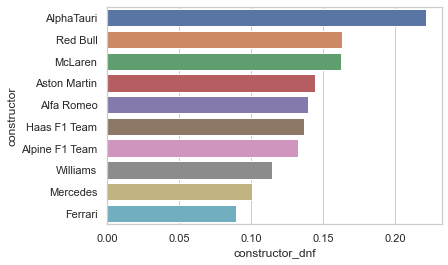

In [19]:
sns.set_theme(style="whitegrid")
sns.barplot(y="constructor", x="constructor_dnf", data=constructor_dnf)

<AxesSubplot:xlabel='driver_dnf', ylabel='fullname'>

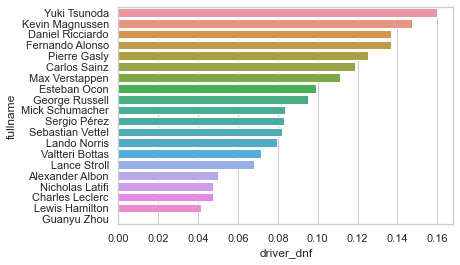

In [20]:
sns.set_theme(style="whitegrid")
sns.barplot(y="fullname", x="driver_dnf", data=driver_dnf)

# Mengabungkan informasi DNF dan menyaring dataset hingga tersisa driver dan constructor aktif

In [21]:
df = pd.merge(df,constructor_dnf,on='constructor')

In [22]:
df = pd.merge(df,driver_dnf,on='fullname')

In [23]:
df.drop(['DNF_status'],axis=1,inplace=True)

In [24]:
df['active_driver'] = df['fullname'].apply(lambda x:x in active_driver)
df['active_constructor'] = df['constructor'].apply(lambda x:x in active_constructor)

In [25]:
df = df[(df['active_driver']==1) & (df['active_constructor']==1)]

In [26]:
df.drop(['active_driver','active_constructor'],axis=1,inplace=True)

In [27]:
df = df.reset_index(drop=True)

# Mengubah dtypes dari date dan dob menjadi datetime

In [28]:
df['date']= pd.to_datetime(df['date'])
df['dob']= pd.to_datetime(df['dob'])

In [29]:
df = df.reset_index(drop=True)

# Mengubah kolom position yang kosong menjadi 21 karena kemungkinan yang dapat diasumsi adalah driver tidak mengikuti race, maupun DNF. Nilai diberikan 21 karena jumlah driver maksimal adalah 20.

In [30]:
df['position'] = df['position'].apply(lambda x: '21' if x == r'\N' else x)

In [31]:
df['position'] = pd.to_numeric(df['position'])

# Menyesuaikan informasi negara supaya tidak menimbulkan variasi yang berlebihan

In [32]:
df['constructor_nationality'] = df['constructor_nationality'].apply(lambda x: 'UK' if x == 'British' else x)
df['constructor_nationality'] = df['constructor_nationality'].apply(lambda x: 'Germany' if x == 'German' else x)
df['constructor_nationality'] = df['constructor_nationality'].apply(lambda x: 'France' if x == 'French' else x)
df['constructor_nationality'] = df['constructor_nationality'].apply(lambda x: 'Italy' if x == 'Italian' else x)
df['constructor_nationality'] = df['constructor_nationality'].apply(lambda x: 'Austria' if x == 'Austrian' else x)
df['constructor_nationality'] = df['constructor_nationality'].apply(lambda x: 'USA' if x == 'American' else x)
df['constructor_nationality'] = df['constructor_nationality'].apply(lambda x: 'India' if x == 'Indian' else x)

df['driver_nationality'] = df['driver_nationality'].apply(lambda x: 'UK' if x == 'British' else x)
df['driver_nationality'] = df['driver_nationality'].apply(lambda x: 'Germany' if x == 'German' else x)
df['driver_nationality'] = df['driver_nationality'].apply(lambda x: 'France' if x == 'French' else x)
df['driver_nationality'] = df['driver_nationality'].apply(lambda x: 'Italy' if x == 'Italian' else x)
df['driver_nationality'] = df['driver_nationality'].apply(lambda x: 'Austria' if x == 'Austrian' else x)
df['driver_nationality'] = df['driver_nationality'].apply(lambda x: 'USA' if x == 'American' else x)
df['driver_nationality'] = df['driver_nationality'].apply(lambda x: 'Monaco' if x == 'Monegasque' else x)
df['driver_nationality'] = df['driver_nationality'].apply(lambda x: 'Mexico' if x == 'Mexican' else x)
df['driver_nationality'] = df['driver_nationality'].apply(lambda x: 'Netherlands' if x == 'Dutch' else x)
df['driver_nationality'] = df['driver_nationality'].apply(lambda x: 'Australia' if x == 'Australian' else x)
df['driver_nationality'] = df['driver_nationality'].apply(lambda x: 'Spain' if x == 'Spanish' else x)
df['driver_nationality'] = df['driver_nationality'].apply(lambda x: 'Canada' if x == 'Canadian' else x)
df['driver_nationality'] = df['driver_nationality'].apply(lambda x: 'Japan' if x == 'Japanese' else x)
df['driver_nationality'] = df['driver_nationality'].apply(lambda x: 'China' if x == 'Chinese' else x)

# Mencari informasi apakah tempat GP merupakan tempat ibu negara dari driver dan constructor.

In [33]:
df['driver_home'] = df['driver_nationality'] == df['country']

In [34]:
df['constructor_home'] = df['constructor_nationality'] == df['country']

In [35]:
df['age_gap'] = df['date'] - df['dob']

In [36]:
df["age_gap"] = df["age_gap"].astype("int64")

# Mengubah data value dari position menjadi klasifikasi yang lebih mudah dipelajari oleh algoritma machine learning. Pada kasus ini pembagian position menjadi tiga yaitu 1 : untuk peringkat 1-3, 2: untuk peringkat 4-10, dan 3 : untuk peringkat >10.

In [37]:
def position_index(x):
    if x<4:
        return 1
    if x>10:
        return 3
    else :
        return 2
df['position'] = df['position'].apply(position_index)

# Membuat dataframe baru supaya dapat menjadi referensi untuk pembuatan aplikasi nantinya.

In [38]:
circuit = df['circuit'] + ';' + df['country']
circuit_unique = circuit.unique()
circuit_info = pd.DataFrame(data=circuit_unique,index=range(len(circuit_unique)),columns=['circuit;country'])
circuit_info[['circuit','country']] = circuit_info['circuit;country'].str.split(';', expand=True)
circuit_info.drop(['circuit;country'],axis=1,inplace=True)

In [39]:
driver = df['fullname'] + ';' + df['driver_nationality'] + ';' + df['dob'].astype(str) + ';' + df['driver_dnf'].astype(str)
driver_unique = driver.unique()
driver_info = pd.DataFrame(data=driver_unique,index=range(len(driver_unique)),columns=['fullname;driver_nationality;dob;driver_dnf'])
driver_info[['fullname','driver_nationality','dob','driver_dnf']] = driver_info['fullname;driver_nationality;dob;driver_dnf'].str.split(';', expand=True)
driver_info.drop(['fullname;driver_nationality;dob;driver_dnf'],axis=1,inplace=True)
driver_info['dob'] = pd.to_datetime(driver_info['dob'])
driver_info['driver_dnf'] = pd.to_numeric(driver_info['driver_dnf'])

In [40]:
constructor = df['constructor'] + ';' + df['constructor_nationality'] + ';' + df['constructor_dnf'].astype(str)
constructor_unique = constructor.unique()
constructor_info = pd.DataFrame(data=constructor_unique,index=range(len(constructor_unique)),columns=['constructor;constructor_nationality;constructor_dnf'])
constructor_info[['constructor','constructor_nationality','constructor_dnf']] = constructor_info['constructor;constructor_nationality;constructor_dnf'].str.split(';', expand=True)
constructor_info.drop(['constructor;constructor_nationality;constructor_dnf'],axis=1,inplace=True)
constructor_info['constructor_dnf'] = pd.to_numeric(constructor_info['constructor_dnf'])
constructor_info = constructor_info.drop(index=[9,11]).reset_index(drop=True)

In [41]:
df.head()

,year,date,grid,position,statusId,dob,driver_nationality,constructor,constructor_nationality,circuit,country,fullname,q_status,constructor_dnf,driver_dnf,driver_home,constructor_home,age_gap
0,2013,2013-03-17,3,2,1,1985-01-07,UK,Mercedes,Germany,Albert Park Grand Prix Circuit,Australia,Lewis Hamilton,1,0.100946,0.041237,False,False,889574400000000000
1,2014,2014-03-16,1,3,5,1985-01-07,UK,Mercedes,Germany,Albert Park Grand Prix Circuit,Australia,Lewis Hamilton,1,0.100946,0.041237,False,False,921024000000000000
2,2015,2015-03-15,1,1,1,1985-01-07,UK,Mercedes,Germany,Albert Park Grand Prix Circuit,Australia,Lewis Hamilton,1,0.100946,0.041237,False,False,952473600000000000
3,2016,2016-03-20,1,1,1,1985-01-07,UK,Mercedes,Germany,Albert Park Grand Prix Circuit,Australia,Lewis Hamilton,1,0.100946,0.041237,False,False,984528000000000000
4,2017,2017-03-26,1,1,1,1985-01-07,UK,Mercedes,Germany,Albert Park Grand Prix Circuit,Australia,Lewis Hamilton,1,0.100946,0.041237,False,False,1016582400000000000


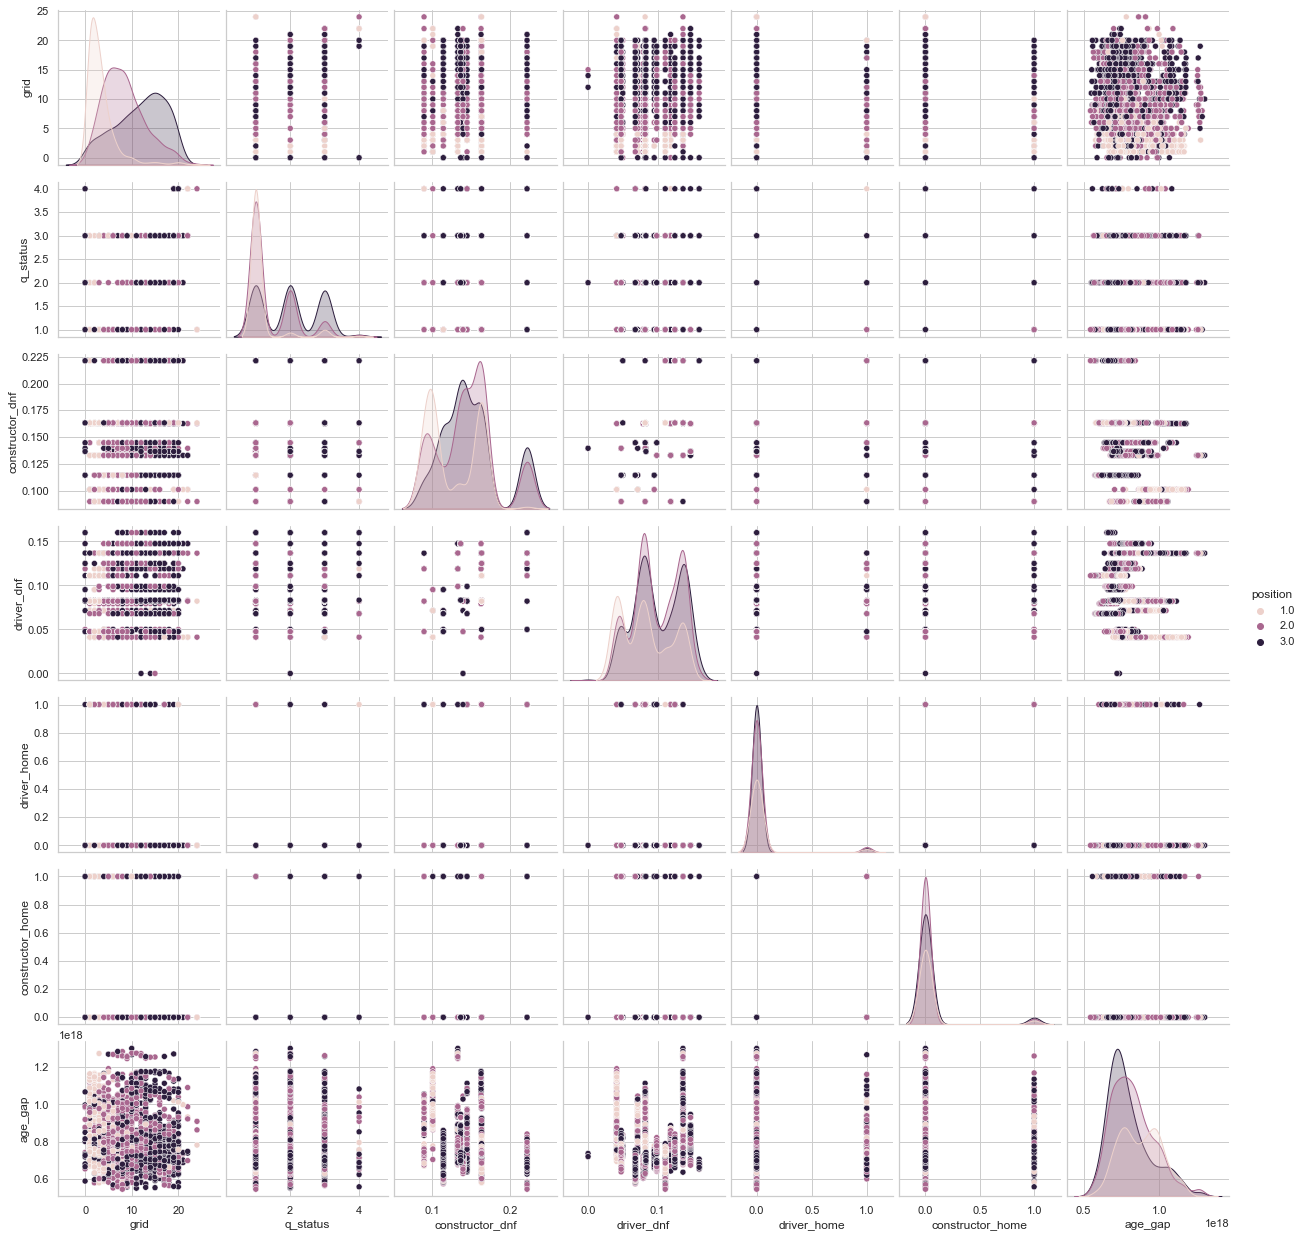

In [42]:
sns.pairplot(df[['grid','q_status','position','constructor_dnf','driver_dnf','driver_home','constructor_home','age_gap']].astype(float),hue='position')

# Modelling data

In [43]:
modelling_data = df[['grid','position','constructor','circuit','fullname','age_gap']]

In [44]:
modelling_data = pd.get_dummies(modelling_data, columns=['circuit','fullname','constructor'])

In [45]:
# Hapus masing-masing dummies data 1 supaya dapat menghasilkan performa yang lebih maksimal
modelling_data.drop(['fullname_Alexander Albon','constructor_Alfa Romeo'],axis=1,inplace=True)

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [47]:
X = modelling_data.drop(['position'],axis=1)
y = modelling_data['position']
X['age_gap'] = X['age_gap'].apply(lambda x:x//31536000000000000)

# Menentukan algoritma klasifikasi yang cocok untuk prediction F1

In [48]:
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),GaussianNB()]
names = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','SVC','GaussianNB']
model_dict = dict(zip(models,names))
mean_results = []
results = []
name = []
for model in models:
    cv = StratifiedKFold(n_splits=50, shuffle=True, random_state=42)
    result = cross_val_score(model,X,y,cv=cv,scoring='accuracy')
    mean_results.append(result.mean())
    results.append(result)
    name.append(model_dict[model])
    print(f'{model_dict[model]} : {result.mean()}')

C:\Users\Nikolas Ermando\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nikolas Ermando\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

C:\Users\Nikolas Ermando\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nikolas Ermando\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

C:\Users\Nikolas Ermando\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Nikolas Ermando\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

LogisticRegression : 0.6114901960784315
DecisionTreeClassifier : 0.5570980392156863
RandomForestClassifier : 0.6067215686274511
SVC : 0.6214039215686273
GaussianNB : 0.46378823529411756


In [49]:
results_df = pd.DataFrame(data=np.transpose(results),index=range(len(results[0])),columns=names)
results_df = results_df.reset_index()
results_df = pd.melt(results_df, id_vars='index', value_vars=list(results_df.columns[1:]),var_name='Column', value_name='Sum of Value')

[Text(0, 0, 'LogisticRegression'),
 Text(1, 0, 'DecisionTreeClassifier'),
 Text(2, 0, 'RandomForestClassifier'),
 Text(3, 0, 'SVC'),
 Text(4, 0, 'GaussianNB')]

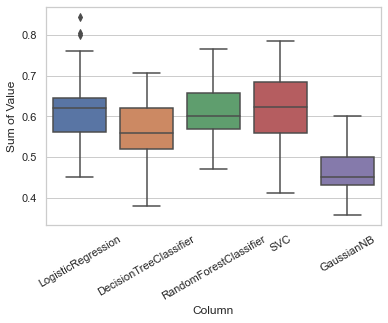

In [50]:
ax = sns.boxplot(x=results_df['Column'],y=results_df['Sum of Value'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

# Mengecek performa pada data testing

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [53]:
svc = SVC()
svc.fit(X_train,y_train)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
preds = svc.predict(X_test)

print(classification_report(preds,y_test))
print("\n")
print(confusion_matrix(preds,y_test))
print("\n")
print(svc.score(X_test,y_test))

              precision    recall  f1-score   support

           1       0.78      0.59      0.67       250
           2       0.67      0.56      0.61       384
           3       0.47      0.76      0.58       198

    accuracy                           0.62       832
   macro avg       0.64      0.64      0.62       832
weighted avg       0.65      0.62      0.62       832



[[148  63  39]
 [ 37 214 133]
 [  5  42 151]]


0.6165865384615384


In [55]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520 entries, 0 to 2519
Data columns (total 67 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   grid                                          2520 non-null   int64
 1   age_gap                                       2520 non-null   int64
 2   circuit_A1-Ring                               2520 non-null   uint8
 3   circuit_Albert Park Grand Prix Circuit        2520 non-null   uint8
 4   circuit_Autodromo Enzo e Dino Ferrari         2520 non-null   uint8
 5   circuit_Autodromo Internazionale del Mugello  2520 non-null   uint8
 6   circuit_Autodromo Nazionale di Monza          2520 non-null   uint8
 7   circuit_Autódromo Hermanos Rodríguez          2520 non-null   uint8
 8   circuit_Autódromo Internacional do Algarve    2520 non-null   uint8
 9   circuit_Autódromo José Carlos Pace            2520 non-null   uint8
 10  circuit_Bahr

# Save Model and Data References

In [ ]:
import pickle

In [ ]:
filename = 'finalized_model.sav'
pickle.dump(svc, open(filename, 'wb'))

In [ ]:
circuit_info.to_csv('circuit_info.csv', index=False)
driver_info.to_csv('driver_info.csv', index=False)
constructor_info.to_csv('constructor_info.csv', index=False)
